In [1]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

Pair 1

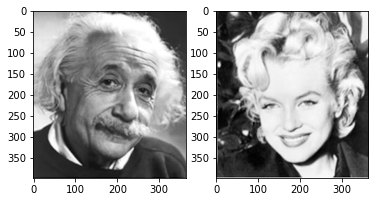

In [2]:
# load and show images
image1 = (cv2.imread('hybrid1a.png',0)).astype(np.float)
image2 = (cv2.imread('hybrid1b.png',0)).astype(np.float)

# resize image2
dim = (image1.shape[1], image1.shape[0])
image2 = cv2.resize(image2, dim)

plt.subplot(1,2,1)
plt.imshow(image1, cmap='gray')
plt.subplot(1,2,2)
plt.imshow(image2, cmap='gray')
plt.show()

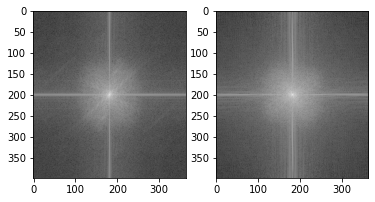

In [3]:
# transform images to frequency domain
image1_fd = np.fft.fft2(image1)
image1_fd_mag = np.fft.fftshift(image1_fd)
image1_fd_mag = 20*np.log(np.abs(image1_fd_mag))

image2_fd = np.fft.fft2(image2)
image2_fd_mag = np.fft.fftshift(image2_fd)
image2_fd_mag = 20*np.log(np.abs(image2_fd_mag))

plt.subplot(1,2,1)
plt.imshow(image1_fd_mag, cmap='gray')
plt.subplot(1,2,2)
plt.imshow(image2_fd_mag, cmap='gray')
plt.show()

In [4]:
# apply high-pass and low-pass filters

np.seterr(divide = 'ignore') 
n1 = 195
n2 = 180

half_w = int(image1_fd_mag.shape[0]/2)
half_h = int(image1_fd_mag.shape[1]/2)
lp = np.zeros(image1_fd_mag.shape)
lp[half_w-n1:half_w+n1+1,half_h-n2:half_h+n2+1] = 1

half_w = int(image2_fd_mag.shape[0]/2)
half_h = int(image2_fd_mag.shape[1]/2)
hp = np.ones(image2_fd_mag.shape)
hp[half_w-n1:half_w+n1+1,half_h-n2:half_h+n2+1] = 0

image1_fd_lp = image1_fd * lp
image2_fd_hp = image2_fd * hp

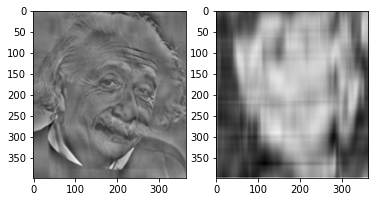

In [5]:
# look at filtered images

image1_lp = np.real(np.fft.ifft2(image1_fd_lp))
image2_hp = np.real(np.fft.ifft2(image2_fd_hp))

plt.subplot(1,2,1)
plt.imshow(image1_lp, cmap='gray')
plt.subplot(1,2,2)
plt.imshow(image2_hp, cmap='gray')
plt.show()

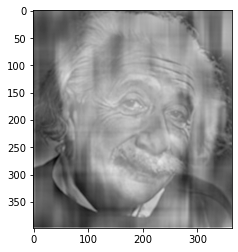

In [6]:
# combine and transform back to spatial domain

hybrid_fd = image1_fd_lp + image2_fd_hp

hybrid = np.real(np.fft.ifft2(hybrid_fd))

plt.imshow(hybrid, cmap='gray')
plt.show()

Pair 2

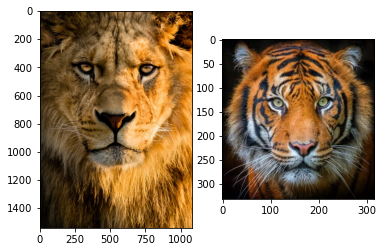

In [7]:
# load and show images
image1 = (cv2.imread('hybrid2a.jpg')).astype(np.float)
image2 = (cv2.imread('hybrid2b.png')).astype(np.float)

# normalize
image1_show = (image1 - np.min(image1)) / (np.max(image1) - np.min(image1))
image2_show = (image2 - np.min(image2)) / (np.max(image2) - np.min(image2))

plt.subplot(1,2,1)
plt.imshow(image1_show[...,::-1])
plt.subplot(1,2,2)
plt.imshow(image2_show[...,::-1])
plt.show()

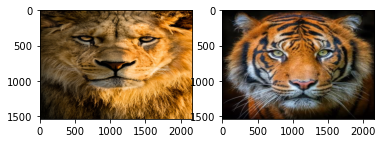

In [8]:
# resize images to be the same

dim = (image1.shape[1]*2, image1.shape[0])
#dim = (1000,1200)
image1 = cv2.resize(image1, dim)
image2 = cv2.resize(image2, dim)

# normalize
image1_show = (image1 - np.min(image1)) / (np.max(image1) - np.min(image1))
image2_show = (image2 - np.min(image2)) / (np.max(image2) - np.min(image2))

plt.subplot(1,2,1)
plt.imshow(image1_show[...,::-1])
plt.subplot(1,2,2)
plt.imshow(image2_show[...,::-1])
plt.show()

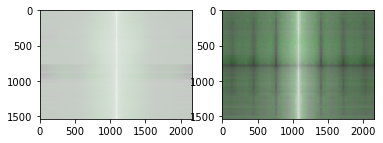

In [9]:
# transform images to frequency domain
image1_fd = np.fft.fft2(image1)
image1_fd_mag = np.fft.fftshift(image1_fd)
image1_fd_mag = 20*np.log(np.abs(image1_fd_mag))

image2_fd = np.fft.fft2(image2)
image2_fd_mag = np.fft.fftshift(image2_fd)
image2_fd_mag = 20*np.log(np.abs(image2_fd_mag))

# normalize
image1_show = (image1_fd_mag - np.min(image1_fd_mag)) / (np.max(image1_fd_mag) - np.min(image1_fd_mag))
image2_show = (image2_fd_mag - np.min(image2_fd_mag)) / (np.max(image2_fd_mag) - np.min(image2_fd_mag))

plt.subplot(1,2,1)
plt.imshow(image1_show[...,::-1])
plt.subplot(1,2,2)
plt.imshow(image2_show[...,::-1])
plt.show()

In [10]:
# apply high-pass and low-pass filters

np.seterr(divide = 'ignore') 
n1 = 769
n2 = 1075

half_w = int(image1_fd_mag.shape[0]/2)
half_h = int(image1_fd_mag.shape[1]/2)
lp = np.zeros(image1_fd_mag.shape)
lp[half_w-n1:half_w+n1+1,half_h-n2:half_h+n2+1] = 1

half_w = int(image2_fd_mag.shape[0]/2)
half_h = int(image2_fd_mag.shape[1]/2)
hp = np.ones(image2_fd_mag.shape)
hp[half_w-n1:half_w+n1+1,half_h-n2:half_h+n2+1] = 0

image1_fd_lp = image1_fd * lp
image2_fd_hp = image2_fd * hp

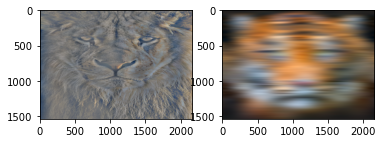

In [11]:
# look at filtered images

image1_lp = np.real(np.fft.ifft2(image1_fd_lp))
image2_hp = np.real(np.fft.ifft2(image2_fd_hp))

image1_lp_show = (image1_lp - np.min(image1_lp)) / (np.max(image1_lp) - np.min(image1_lp))
image2_hp_show = (image2_hp - np.min(image2_hp)) / (np.max(image2_hp) - np.min(image2_hp))

plt.subplot(1,2,1)
plt.imshow(image1_lp_show[...,::-1])
plt.subplot(1,2,2)
plt.imshow(image2_hp_show[...,::-1])
plt.show()

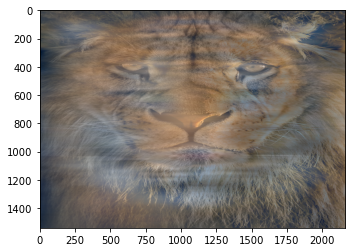

In [12]:
# combine and transform back to spatial domain

hybrid_fd = image1_fd_lp + image2_fd_hp

hybrid = np.real(np.fft.ifft2(hybrid_fd))

hybrid_show = (hybrid - np.min(hybrid)) / (np.max(hybrid) - np.min(hybrid))

plt.imshow(hybrid_show[...,::-1])
plt.show()